# Plot Confusion Matrix

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\HARDIK\NLP END TO END\NLP_COURSE_HELP\TextFiles\moviereviews2.tsv", sep='\t')
df.head()

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


In [3]:
df['label'].value_counts()

pos    3000
neg    3000
Name: label, dtype: int64

In [4]:
# Check for whitespace strings (it's OK if there aren't any!):

# Remove empty string

blanks = []

# (index, label, review text)
for i,lb,rv in df.itertuples():
    if type(rv) == str:
        if rv.isspace():
            blanks.append(i)
        
blanks

[]

In [5]:
df.isna().sum()

label      0
review    20
dtype: int64

In [6]:
df.dropna(inplace=True)

df.isnull().sum()

label     0
review    0
dtype: int64

In [7]:
X = df['review']
y = df['label']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22, random_state=42)

# Building a pipeline

In [8]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])


text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [9]:
# Form a prediction set
pred = text_clf.predict(X_test)

In [10]:
# Print a classification report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         neg       0.94      0.91      0.92       653
         pos       0.91      0.94      0.93       663

    accuracy                           0.92      1316
   macro avg       0.92      0.92      0.92      1316
weighted avg       0.92      0.92      0.92      1316



[[592  61]
 [ 40 623]]


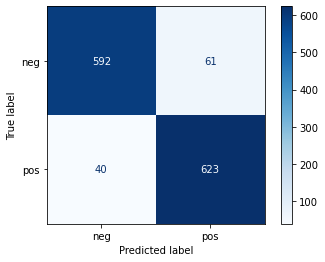

In [11]:
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_test,pred))
disp = plot_confusion_matrix(text_clf, X_test, y_test, cmap='Blues', values_format='.3g')
disp